# Compare Sequential Louvain

Running Sequential Louvain...
[DEBUG] simpleLouvain: Exceeded 10 * N iterations; breaking out.
Final community assignments for each node:
Node 0 -> Community 2
Node 1 -> Community 2
Node 2 -> Community 6
Node 3 -> Community 2
Node 4 -> Community 6
Node 5 -> Community 2
Node 6 -> Community 2
Node 7 -> Community 2
Node 8 -> Community 2
Node 9 -> Community 2
Node 10 -> Community 2
Node 11 -> Community 2
Node 12 -> Community 2
Node 13 -> Community 2
Node 14 -> Community 2
Node 15 -> Community 2
Node 16 -> Community 2
Node 17 -> Community 2
Node 18 -> Community 2
Node 19 -> Community 2
Node 20 -> Community 2
Node 21 -> Community 2
Node 22 -> Community 2
Node 23 -> Community 2
Node 24 -> Community 2
Node 25 -> Community 2
Node 26 -> Community 2
Node 27 -> Community 2
Node 28 -> Community 2
Node 29 -> Community 2
Node 30 -> Community 2
Node 31 -> Community 2
Node 32 -> Community 2
Node 33 -> Community 2
Node 34 -> Community 2
Node 35 -> Community 2
Node 36 -> Community 2
Node 37 -> Community 

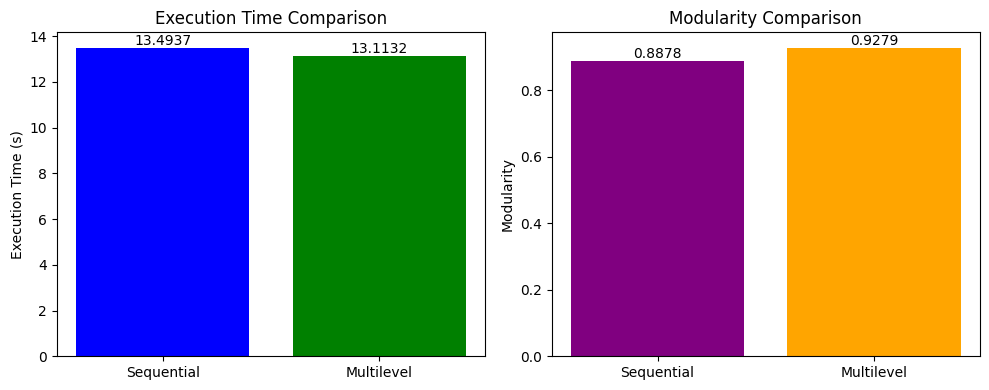

In [41]:
import subprocess
import time
import sys
import re
import matplotlib.pyplot as plt

def run_louvain_live(executable, graph_file):
    """
    Run the given executable with the graph file argument in a Jupyter Notebook.
    This version uses subprocess.Popen to stream output live.
    Returns the full stdout and measured execution time.
    """
    start = time.time()
    
    # Use gstdbuf (GNU stdbuf, installed via coreutils on macOS) to force line buffering.
    process = subprocess.Popen(["gstdbuf", "-oL", executable, graph_file],
                               stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE,
                               text=True)
    stdout_lines = []
    
    # Read output line-by-line.
    while True:
        line = process.stdout.readline()
        if line:
            print(line, end="")  # Print in real time.
            stdout_lines.append(line)
        else:
            if process.poll() is not None:
                break
    
    # Read any remaining stderr.
    err = process.stderr.read()
    if err:
        print(err, file=sys.stderr)
    
    end = time.time()
    exec_time = end - start
    full_output = "".join(stdout_lines)
    return full_output, exec_time


def parse_modularity(output):
    """
    Search for a line like 'Modularity: <value>' in the output and return that value as float.
    """
    match = re.search(r"Modularity:\s*([-+]?[0-9]*\.?[0-9]+)", output)
    if match:
        return float(match.group(1))
    return None

if __name__ == "__main__":
    # Update the paths if necessary.
    sequential_exe = "./Louvain_C_files/louvain_sequential"   # Path to the sequential executable
    multilevel_exe = "./Louvain_C_files/louvain_multilevel"     # Path to the multilevel executable
    graph_file =  "Generated_Graphs/watts_graph_1000_10_01.txt"          # Your input graph file
            # "Generated_Graphs/barabasi_graph_100_10_3.txt"
            # "Generated_Graphs/graph_200_01.txt"    
    # Run the sequential version, printing debug output in real time.
    print("Running Sequential Louvain...")
    output_seq, time_seq = run_louvain_live(sequential_exe, graph_file)
    mod_seq = parse_modularity(output_seq)

    # Run the multilevel version.
    print("\nRunning Multilevel Louvain...")
    output_multi, time_multi = run_louvain_live(multilevel_exe, graph_file)
    mod_multi = parse_modularity(output_multi)

    # Print outputs.
    print("\n=== Sequential Louvain Output ===")
    print(output_seq)
    print("Execution time: {:.4f} seconds".format(time_seq))
    if mod_seq is not None:
        print("Modularity: {:.4f}".format(mod_seq))
    else:
        print("Modularity not found in sequential output.")

    print("\n=== Multilevel Louvain Output ===")
    print(output_multi)
    print("Execution time: {:.4f} seconds".format(time_multi))
    if mod_multi is not None:
        print("Modularity: {:.4f}".format(mod_multi))
    else:
        print("Modularity not found in multilevel output.")

    # Plot comparisons.
    methods = ["Sequential", "Multilevel"]
    times = [time_seq, time_multi]
    modularities = [mod_seq, mod_multi]

    plt.figure(figsize=(10, 4))

    # Execution time comparison plot.
    plt.subplot(1, 2, 1)
    plt.bar(methods, times, color=['blue', 'green'])
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time Comparison")
    for i, t in enumerate(times):
        plt.text(i, t, f"{t:.4f}", ha="center", va="bottom")

    # Modularity comparison plot.
    plt.subplot(1, 2, 2)
    plt.bar(methods, modularities, color=['purple', 'orange'])
    plt.ylabel("Modularity")
    plt.title("Modularity Comparison")
    for i, mod in enumerate(modularities):
        if mod is not None:
            plt.text(i, mod, f"{mod:.4f}", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()


# Trash

In [ ]:
import subprocess
import time
import re
import matplotlib.pyplot as plt

def run_louvain(executable, graph_file):
    """
    Run the given executable with the graph file argument.
    Returns the stdout output and measured execution time.
    """
    start = time.time()
    result = subprocess.run([executable, graph_file],
                            stdout=subprocess.PIPE,
                            stderr=subprocess.PIPE,
                            text=True)
    end = time.time()
    exec_time = end - start
    return result.stdout, exec_time

def parse_modularity(output):
    """
    Search for a line like 'Modularity: <value>' in the output and return that value as float.
    """
    match = re.search(r"Modularity:\s*([-+]?[0-9]*\.?[0-9]+)", output)
    if match:
        return float(match.group(1))
    return None

if __name__ == "__main__":
    # Update the paths if necessary.
    sequential_exe = "./Louvain_C_files/louvain_sequential"   # Path to the sequential executable
    multilevel_exe = "./Louvain_C_files/louvain_multilevel"     # Path to the multilevel executable
    graph_file = "Generated_Graphs/graph_200_01.txt"             # Your input graph file

    # Run the sequential version.
    output_seq, time_seq = run_louvain(sequential_exe, graph_file)
    mod_seq = parse_modularity(output_seq)

    # Run the multilevel version.
    output_multi, time_multi = run_louvain(multilevel_exe, graph_file)
    mod_multi = parse_modularity(output_multi)

    # Print outputs.
    print("=== Sequential Louvain Output ===")
    print(output_seq)
    print("Execution time: {:.4f} seconds".format(time_seq))
    if mod_seq is not None:
        print("Modularity: {:.4f}".format(mod_seq))
    else:
        print("Modularity not found in sequential output.")

    print("\n=== Multilevel Louvain Output ===")
    print(output_multi)
    print("Execution time: {:.4f} seconds".format(time_multi))
    if mod_multi is not None:
        print("Modularity: {:.4f}".format(mod_multi))
    else:
        print("Modularity not found in multilevel output.")

    # Plot comparisons.
    methods = ["Sequential", "Multilevel"]
    times = [time_seq, time_multi]
    modularities = [mod_seq, mod_multi]

    plt.figure(figsize=(10, 4))

    # Execution time comparison plot.
    plt.subplot(1, 2, 1)
    plt.bar(methods, times, color=['blue', 'green'])
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time Comparison")
    for i, t in enumerate(times):
        plt.text(i, t, f"{t:.4f}", ha="center", va="bottom")

    # Modularity comparison plot.
    plt.subplot(1, 2, 2)
    plt.bar(methods, modularities, color=['purple', 'orange'])
    plt.ylabel("Modularity")
    plt.title("Modularity Comparison")
    for i, mod in enumerate(modularities):
        if mod is not None:
            plt.text(i, mod, f"{mod:.4f}", ha="center", va="bottom")

    plt.tight_layout()
    plt.show()
